ここでは、主な方法であるトークンのone-hotエンコーディングとトークン埋め込みの２つを紹介する。<br>
トークン埋め込みは単語でのみ使用されるため、単語埋め込みとも呼ばれる。<br>

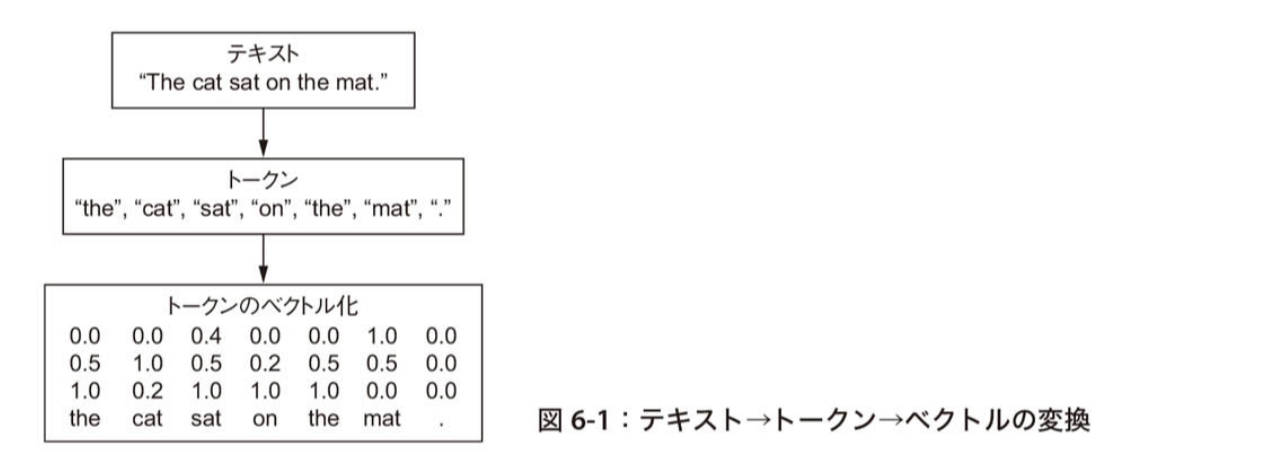

In [1]:
# 画像の表示
from IPython.display import Image
Image(filename='00.png', width=600)

### 単語と文字のone-hotエンコーディング

In [2]:
import numpy as np

# 初期データ : サンプルごとにエントリが１つ含まれている
# （この単純な例では、サンプルが単なる１つの文章だが、文章全体でもOK）
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# データに含まれている全てのトークンのインデックスを構築
token_index = {}
for sample in samples:
    # ここでは単にsplitメソッドを使ってサンプルをトークン化する
    # 実際には、サンプルから句読点と特殊な文字を取り除くことになる
    for word in sample.split():
        if word not in token_index:
            # 一意な単語にそれぞれ一意なインデックスを割り当てする
            # インデックス0をどの単語にも割り当てないことに注意
            token_index[word] = len(token_index) + 1
            
# 次に、サンプルをベクトル化する : サンプルごとに最初のmax_length個の単語だけを考慮
max_length = 10

# 結果の格納場所
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))

In [3]:
results.shape

(2, 10, 11)

In [4]:
for i, sample in enumerate(samples):
    # print(i, sample)
    for j , word in list(enumerate(sample.split()))[:max_length]:
        # print(j, word)
        index = token_index.get(word)
        # print(index)
        results[i, j, index] = 1.

In [5]:
results.shape

(2, 10, 11)

### kerasを使ったone-hotエンコーディングについて

In [26]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 出現頻度が最も高い1,000個の単語だけを処理するように設定されたトークナイザを作成
# 1000次元
tokenizer = Tokenizer(num_words = 10)

# 単語のインデックスを構築
tokenizer.fit_on_texts(samples)

# 文字列を整数のインデックスのリストに変換
sequences = tokenizer.texts_to_sequences(samples)

In [27]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [28]:
# ２値のone_hotエンコーディング表現を直接取得することも可能
# one_hotエンコーディング以外のベクトル化モードもサポート
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [33]:
from keras.preprocessing.text import Tokenizer

samples = ['This is a pen.', 'That is a pen.']

# 出現頻度が最も高い1,000個の単語だけを処理するように設定されたトークナイザを作成
# 1000次元
tokenizer = Tokenizer(num_words = 10)

# 単語のインデックスを構築
tokenizer.fit_on_texts(samples)

# 文字列を整数のインデックスのリストに変換
sequences = tokenizer.texts_to_sequences(samples)

In [34]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [35]:
one_hot_results.shape

(2, 10)

In [37]:
one_hot_results[1]

array([0., 1., 1., 1., 0., 1., 0., 0., 0., 0.])

In [53]:
# 計算された単語のインデックスを復元する方法
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


### kerasを使ったone-hotハッシュトリックについて

単語を固定サイズのベクトルにハッシュ化。<br>
メモリの節約、データのオンラインエンコーディング。<br>
データが全て揃う前にトークンベクトルを生成可能。<br>

欠点の１つとして、ハッシュ衝突。<br>
２つの異なる単語のハッシュが同じになってしまう。<br>

In [67]:
samples = ['The cat sat on mat.', 'The dog ate my homework.']
# 単語サイズが1,000のベクトルとして格納
# 単語の数が1,000個に近い(またはそれ以上である)場合は、
# ハッシュ衝突が頻繁し、このエンコーディング手法の精度が低下することにすることに注意
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    # print(i, sample)
    for j, word in list(enumerate(sample.split()))[:max_length]:
        print("")
        print(j, word)
        # 単語をハッシュ化し、0 ~ 1000のランダムな整数に変換
        index = abs(hash(word)) % dimensionality
        print(index)
        results[i, j, index] = 1.


0 The
401

1 cat
67

2 sat
807

3 on
814

4 mat.
191

0 The
401

1 dog
913

2 ate
931

3 my
547

4 homework.
104


In [70]:
# 最終的な結果の形について
results.shape

(2, 10, 1000)

In [71]:
# 最初の文章の形について
results[0].shape

(10, 1000)

In [73]:
# Theがどのようなベクトルに変換されたか
results[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.